<a href="https://colab.research.google.com/github/TranNgocXuanThanh/AI-11-3/blob/main/AI_11_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=1a7571c22ddb4df99f0c9551e028f0531afdc661cabaa16213fc714878668d02
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


104.0786384976526


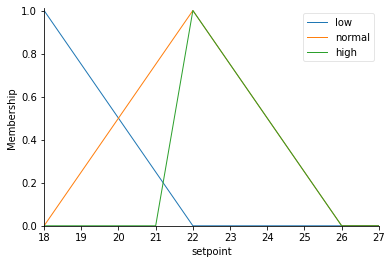

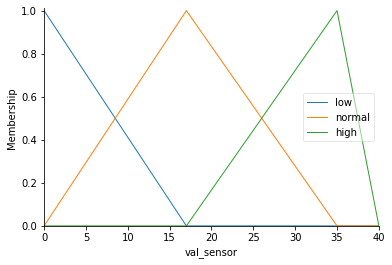

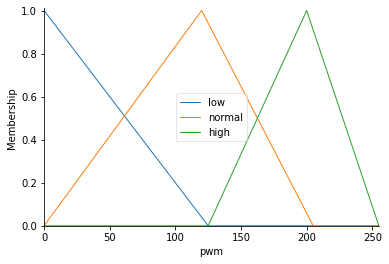

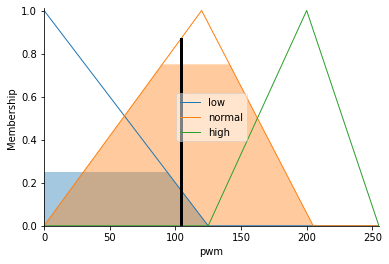

In [2]:
#dieu khien dong co AC
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
setpoint = ctrl.Antecedent(np.arange(18,28,1),'setpoint')
val_sensor = ctrl.Antecedent(np.arange(0,41,1),'val_sensor')
pwm = ctrl.Consequent(np.arange(0,256,1),'pwm')


setpoint['low'] = fuzz.trimf(setpoint.universe,[18,18,22])
setpoint['normal'] = fuzz.trimf(setpoint.universe,[18,22,26])
setpoint['high'] = fuzz.trimf(setpoint.universe,[22,22,26])

val_sensor['low'] = fuzz.trimf(val_sensor.universe,[0,0,17])
val_sensor['normal'] = fuzz.trimf(val_sensor.universe,[0,17,35])
val_sensor['high'] = fuzz.trimf(val_sensor.universe,[17,35,40])

pwm['low'] = fuzz.trimf(pwm.universe,[0,0,125])
pwm['normal'] = fuzz.trimf(pwm.universe,[0,120,205])
pwm['high'] = fuzz.trimf(pwm.universe,[125,200,255])

rule1 = ctrl.Rule(setpoint['low']&val_sensor['low'],pwm['low'])
rule2 = ctrl.Rule(setpoint['low']&val_sensor['normal'],pwm['low'])
rule3 = ctrl.Rule(setpoint['normal']&val_sensor['normal'],pwm['normal'])
rule4 = ctrl.Rule(setpoint['normal']&val_sensor['high'],pwm['normal'])
rule5 = ctrl.Rule(setpoint['normal']&val_sensor['low'],pwm['normal'])
rule6 = ctrl.Rule(setpoint['high']&val_sensor['low'],pwm['normal'])
rule7 = ctrl.Rule(setpoint['high']&val_sensor['normal'],pwm['normal'])
rule8 = ctrl.Rule(setpoint['low']&val_sensor['high'],pwm['normal'])
rule9 = ctrl.Rule(setpoint['high']&val_sensor['high'],pwm['high'])

setpoint.view()
val_sensor.view()
pwm.view()

pwm_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
pwming = ctrl.ControlSystemSimulation(pwm_ctrl)

pwming.input['setpoint']=21
pwming.input['val_sensor']=18
pwming.compute()
print(pwming.output['pwm'])
pwm.view(sim=pwming)

47.306122844785726
-46.38888888888889


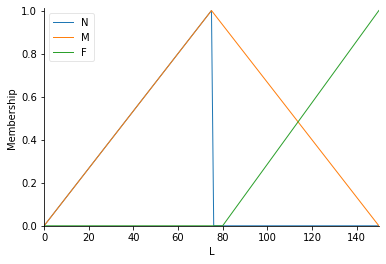

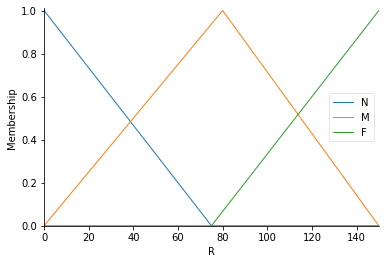

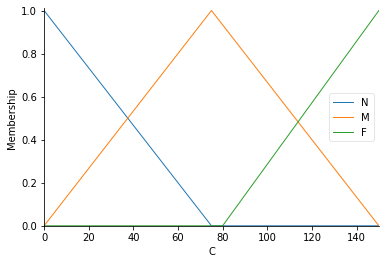

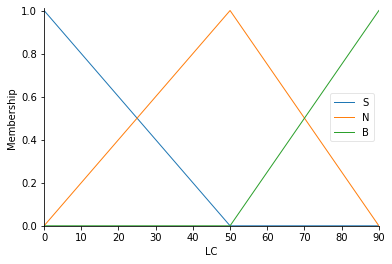

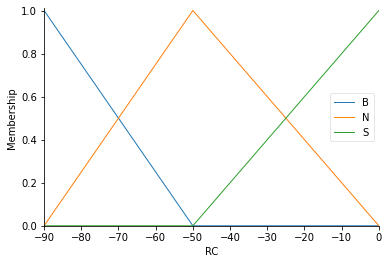

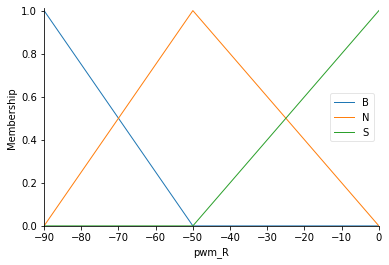

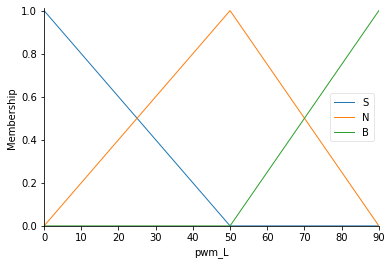

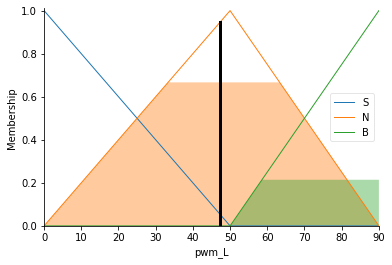

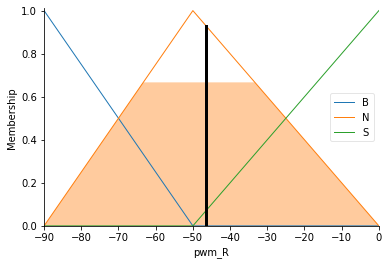

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
L = ctrl.Antecedent(np.arange(0,151,1),'L')
C = ctrl.Antecedent(np.arange(0,151,1),'C')
R = ctrl.Antecedent(np.arange(0,151,1),'R')

LC = ctrl.Consequent(np.arange(0,91,1),'LC')
RC = ctrl.Consequent(np.arange(-90,1,1),'RC')

pwm_L = ctrl.Consequent(np.arange(0,91,1),'pwm_L')
pwm_R = ctrl.Consequent(np.arange(-90,1,1),'pwm_R')

L['N'] = fuzz.trimf(L.universe,[0,75,75])
L['M'] = fuzz.trimf(L.universe,[0,75,150])
L['F'] = fuzz.trimf(L.universe,[80,150,150])

C['N'] = fuzz.trimf(C.universe,[0,0,75])
C['M'] = fuzz.trimf(C.universe,[0,75,150])
C['F'] = fuzz.trimf(C.universe,[80,150,150])

R['N'] = fuzz.trimf(R.universe,[0,0,75])
R['M'] = fuzz.trimf(R.universe,[0,80,150])
R['F'] = fuzz.trimf(R.universe,[75,150,150])

RC['B'] = fuzz.trimf(RC.universe,[-90,-90,-50])
RC['N'] = fuzz.trimf(RC.universe,[-90,-50,0])
RC['S'] = fuzz.trimf(RC.universe,[-50,0,0])

LC['S'] = fuzz.trimf(LC.universe,[0,0,50])
LC['N'] = fuzz.trimf(LC.universe,[0,50,90])
LC['B'] = fuzz.trimf(LC.universe,[50,90,90])

pwm_R ['B'] = fuzz.trimf(pwm_R .universe,[-90,-90,-50])
pwm_R ['N'] = fuzz.trimf(pwm_R .universe,[-90,-50,0])
pwm_R ['S'] = fuzz.trimf(pwm_R .universe,[-50,0,0])

pwm_L['S'] = fuzz.trimf(pwm_L.universe,[0,0,50])
pwm_L['N'] = fuzz.trimf(pwm_L.universe,[0,50,90])
pwm_L['B'] = fuzz.trimf(pwm_L.universe,[50,90,90])

L.view()
R.view()
C.view()
LC.view()
RC.view()
pwm_R.view()
pwm_L.view()

rule1 = ctrl.Rule(L['N']&C['N'],LC['S'])
rule2 = ctrl.Rule(L['N']&C['M'],LC['N'])
rule3 = ctrl.Rule(L['N']&C['F'],LC['B'])
rule4 = ctrl.Rule(L['M']&C['N'],LC['S'])
rule5 = ctrl.Rule(L['M']&C['M'],LC['N'])
rule6 = ctrl.Rule(L['M']&C['F'],LC['N'])
rule7 = ctrl.Rule(L['F']&C['N'],LC['S'])
rule8 = ctrl.Rule(L['F']&C['M'],LC['N'])
rule9 = ctrl.Rule(L['F']&C['F'],LC['B'])

rule10 = ctrl.Rule(R['N']&C['N'],RC['S'])
rule11 = ctrl.Rule(R['N']&C['M'],RC['N'])
rule12 = ctrl.Rule(R['N']&C['F'],RC['B'])
rule13 = ctrl.Rule(R['M']&C['N'],RC['S'])
rule14 = ctrl.Rule(R['M']&C['M'],RC['N'])
rule15 = ctrl.Rule(R['M']&C['F'],RC['N'])
rule16 = ctrl.Rule(R['F']&C['N'],RC['S'])
rule17 = ctrl.Rule(R['F']&C['M'],RC['N'])
rule18 = ctrl.Rule(R['F']&C['F'],RC['B'])

rule19 = ctrl.Rule(RC['S']&LC['S'],pwm_R['S'])
rule20 = ctrl.Rule(RC['N']&LC['S'],pwm_R['S'])
rule21 = ctrl.Rule(RC['B']&LC['S'],pwm_R['N'])
rule22 = ctrl.Rule(RC['S']&LC['N'],pwm_R['S'])
rule23 = ctrl.Rule(RC['N']&LC['N'],pwm_R['N'])
rule24 = ctrl.Rule(RC['B']&LC['N'],pwm_R['N'])
rule25 = ctrl.Rule(RC['S']&LC['B'],pwm_R['N'])
rule26 = ctrl.Rule(RC['N']&LC['B'],pwm_R['N'])
rule27 = ctrl.Rule(RC['B']&LC['B'],pwm_R['B'])

rule28 = ctrl.Rule(RC['S']&LC['S'],pwm_L['S'])
rule29 = ctrl.Rule(RC['N']&LC['S'],pwm_L['S'])
rule30 = ctrl.Rule(RC['B']&LC['S'],pwm_L['N'])
rule31 = ctrl.Rule(RC['S']&LC['N'],pwm_L['N'])
rule32 = ctrl.Rule(RC['N']&LC['N'],pwm_L['N'])
rule33 = ctrl.Rule(RC['B']&LC['N'],pwm_L['B'])
rule34 = ctrl.Rule(RC['S']&LC['B'],pwm_L['N'])
rule35 = ctrl.Rule(RC['N']&LC['B'],pwm_L['B'])
rule36 = ctrl.Rule(RC['B']&LC['B'],pwm_L['B'])

pwm_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,
                              rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,
                              rule18,rule19,rule20,rule21,rule22,rule23,rule25,rule26,
                              rule28,rule29,rule30,rule31,rule32,rule33,rule34,rule35,rule36])
pwming = ctrl.ControlSystemSimulation(pwm_ctrl)

pwming.input['L']=50
pwming.input['C']=95
pwming.input['R']=95
pwming.compute()
print(pwming.output['pwm_L'])
print(pwming.output['pwm_R'])
pwm_L.view(sim=pwming)
pwm_R.view(sim=pwming)
